In [1]:
from google.colab import files
import pandas as pd

# It will prompt you to select a file. Click on “Choose Files” then select and upload the file.
uploaded = files.upload()




Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [2]:
# To load the file into a pandas DataFrame

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [3]:
# Let's see the first few rows of the DataFrame
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [4]:
import matplotlib.pyplot as plt
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Here, ‘age’, ‘creatinine_phosphokinase’,
‘ejection_fraction’, ‘platelets’,
‘serum_creatinine’, ‘serum_sodium’, ‘time’ are the continuous variables.

And ‘anaemia’, ‘diabetes’,
‘high_blood_pressure’, ‘sex’, ‘smoking’,
‘DEATH_EVENT’ are the categorical variables. All the categorical variables have only 0 and 1 values. So, ‘sex’ only says if it is a male or female, ‘high_blood_pressure’ says if the person has high blood pressure or not, ‘anaemia’ says if the person is suffering from anaemia or not.

I like to start most of the EDA project by observing the distribution of the continuous variables.

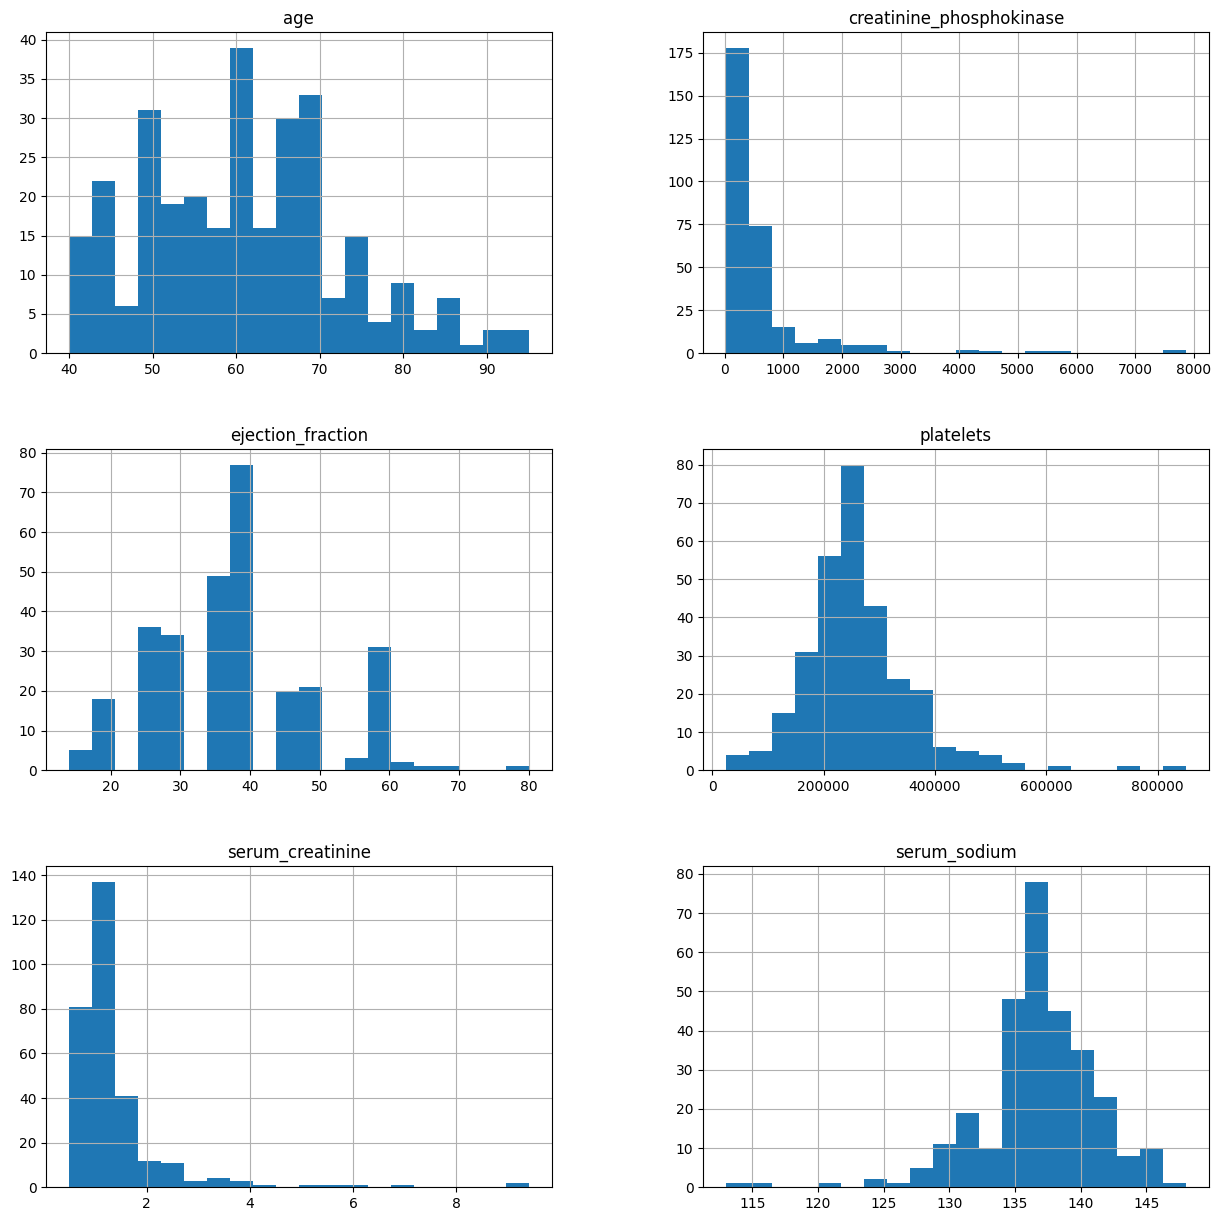

In [5]:
df[['age', 'creatinine_phosphokinase',
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].hist(bins=20,
                                                                               figsize=(15, 15))
plt.show()

It shows at a glance where the majority population lies and the nature of the distribution.

To get an understanding of data, it is helpful to find some commonly used descriptive variable data such as mean, median, max, min, std, and quartiles.

In [6]:
continous_var = ['age', 'creatinine_phosphokinase',
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
df[continous_var].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


Now as we have seen the distribution separately and statistical parameters, tt will be nice to see how each of these variables relates to the ‘DEATH_EVENT’. This column has 0 and 1 values. I will change it to ‘yes’ and ‘no’. I also want to change the ‘sex’ column and replace 0 and 1 with ‘male’ and ‘female’.

In [7]:
df['sex1'] = df['sex'].replace({1: "Male", 0: "Female"})
df['death'] = df['DEATH_EVENT'].replace({1: "yes", 0: "no"})

If you check the columns now, you will see two additional columns: ‘sex1’ and ‘death’ in the dataset. In the next plot, we will see a pairplot that will show the relationship between each of the continuous variables with the rest of them. We will also use a different color for death events.


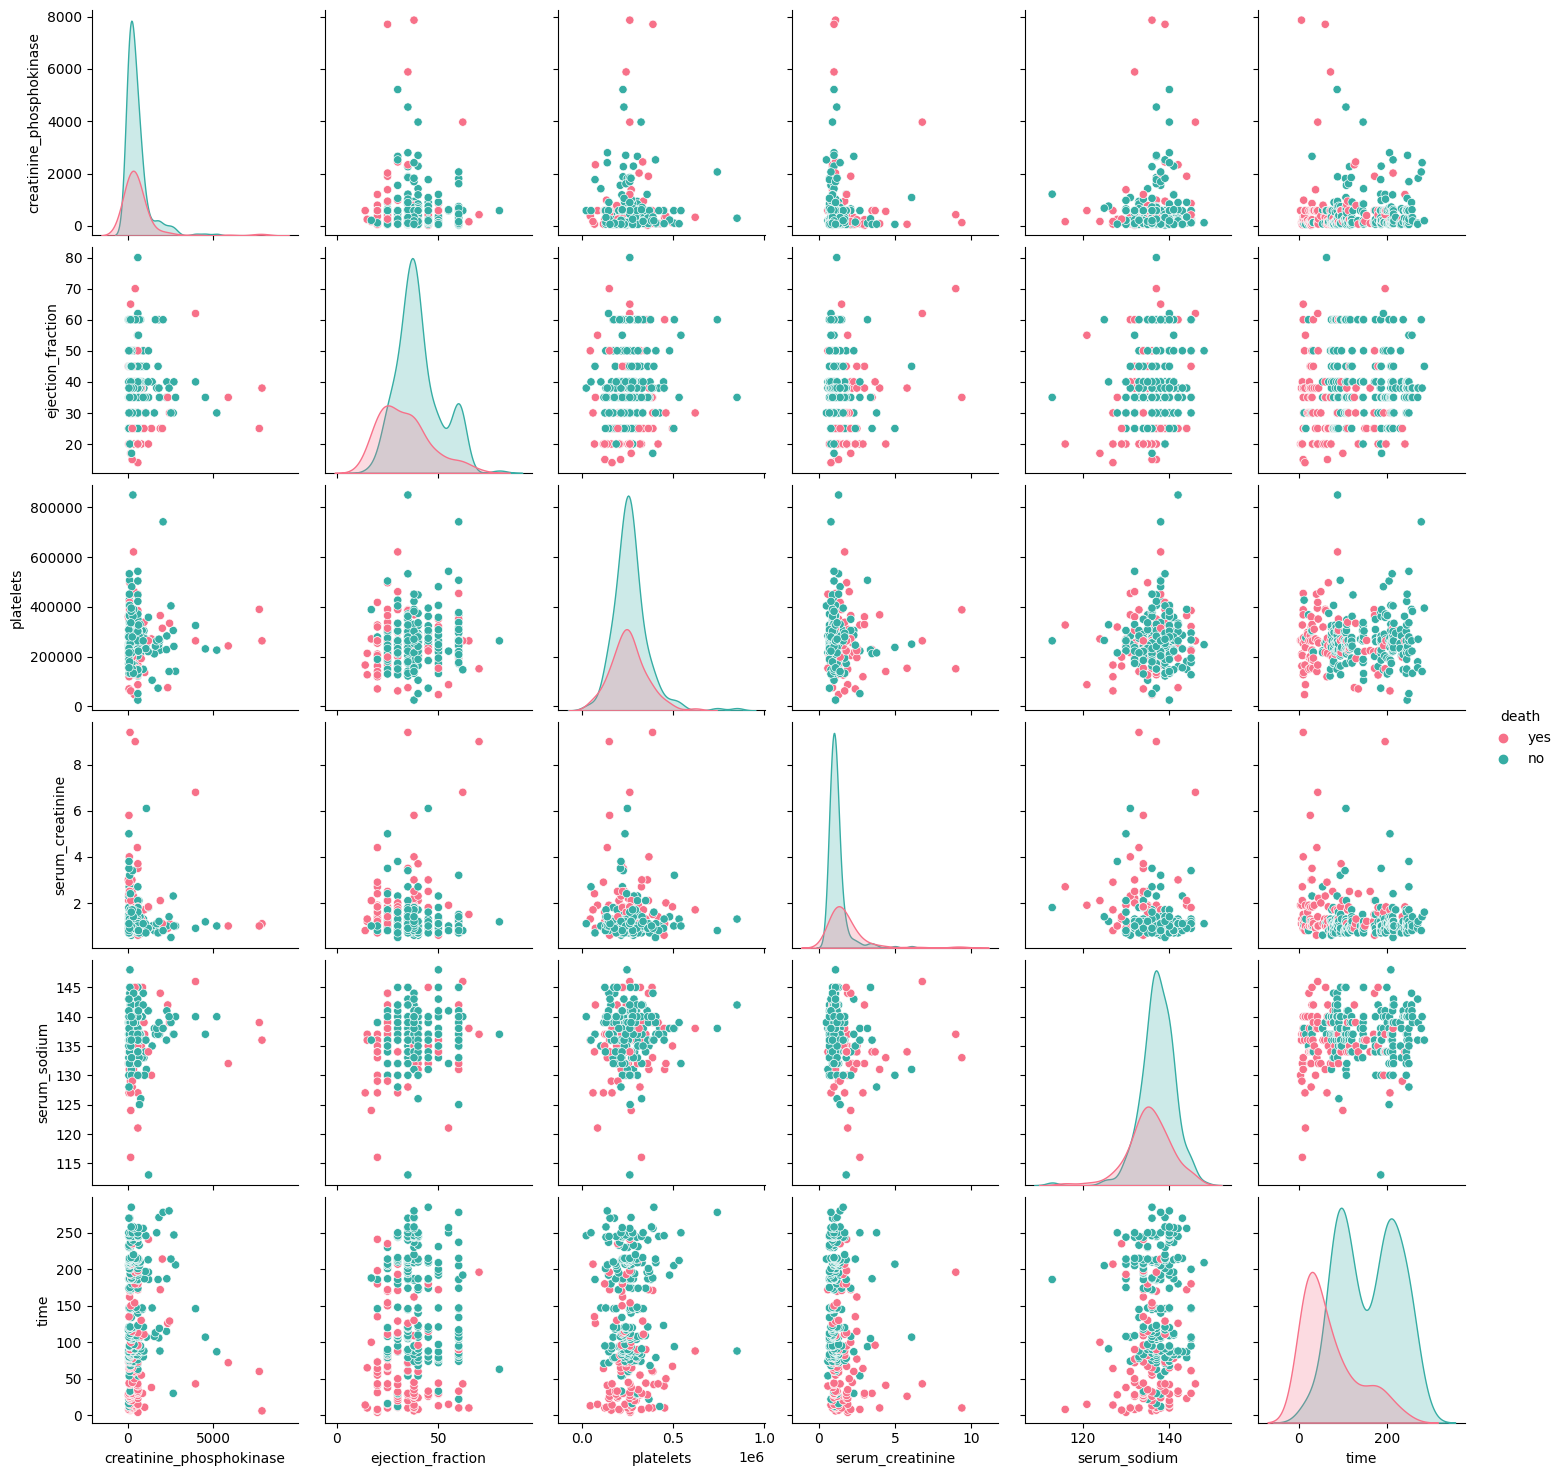

In [10]:
import seaborn as sns

sns.pairplot(df[["creatinine_phosphokinase", "ejection_fraction",
                       "platelets", "serum_creatinine",
                       "serum_sodium", "time", "death"]], hue = "death",
            diag_kind='kde', kind='scatter', palette='husl')
plt.show()

Here, the red color shows the death event and the green color represents no death. This plot shows how each of these variables is segregated between death events. Besides, the scatter plot, the density plot in between shows a clear distinction of data for death events and no death events. Boxplots will give a little more clarity on that:

<ipython-input-11-780fcd1ab716>:10: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df.loc[df["death"]=='no', col], label="alive", color = "green", shade=True, kernel='gau', cut=0)
<ipython-input-11-780fcd1ab716>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["death"]=='no', col], label="alive", color = "green", shade=True, kernel='gau', cut=0)
<ipython-input-11-780fcd1ab716>:11: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df.loc[df["death"]=='yes', col], label="dead",  color = "red", shade=True, kernel='gau', cut=0)
<ipython-input-11-780fcd1ab716>:11: FutureWarning: 

`shade` is now deprecated in favor 

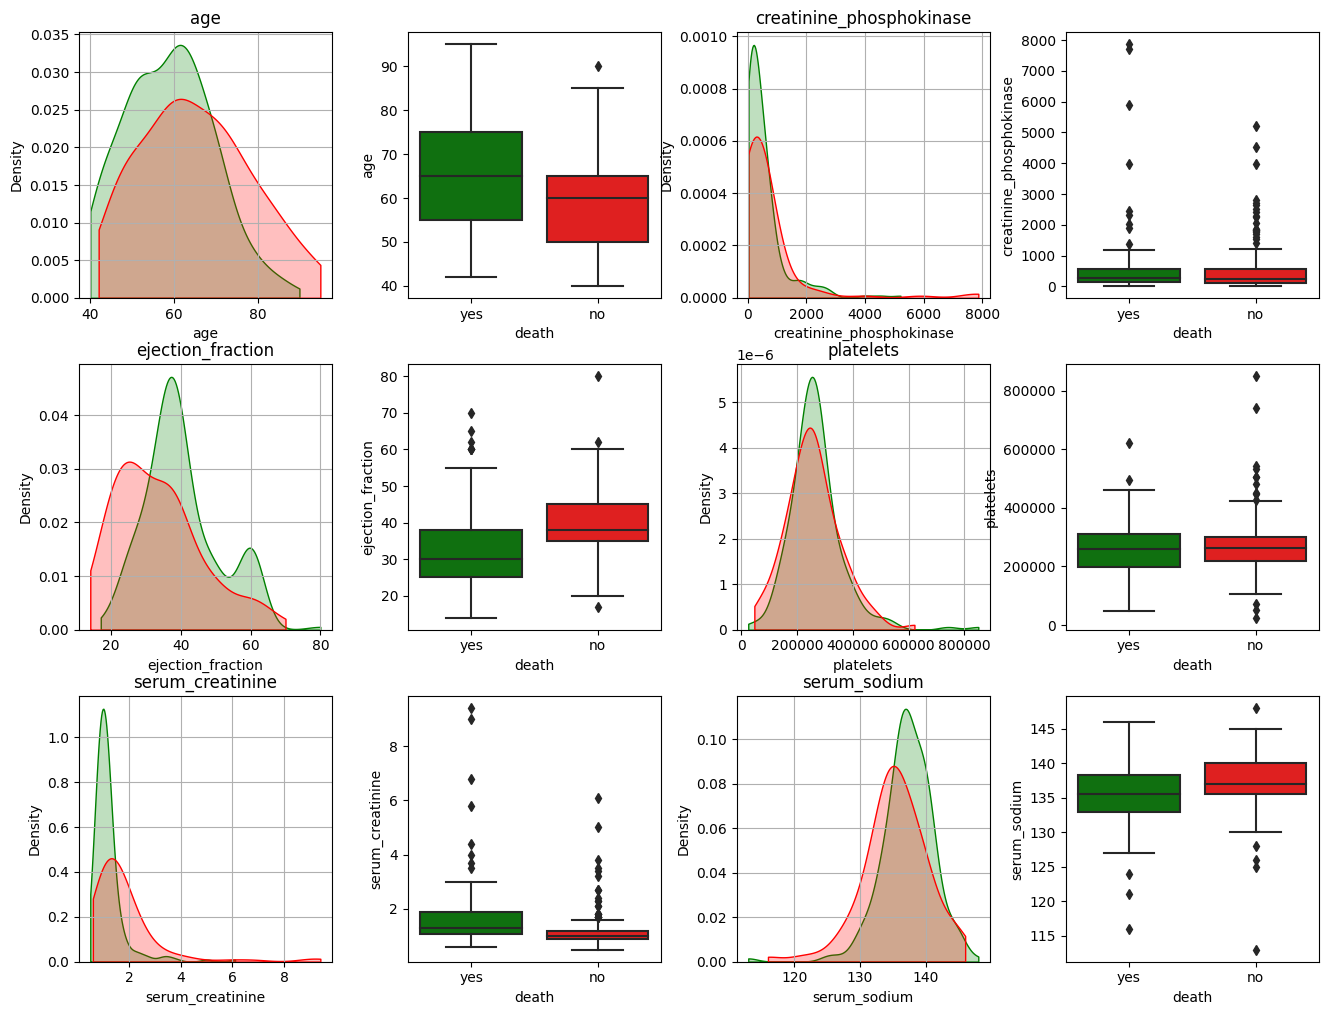

In [11]:
continous_var = ['age', 'creatinine_phosphokinase',
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
plt.figure(figsize=(16, 25))
for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)

    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df["death"]=='no', col], label="alive", color = "green", shade=True, kernel='gau', cut=0)
    sns.kdeplot(df.loc[df["death"]=='yes', col], label="dead",  color = "red", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y = col, data = df, x="death", palette = ["green", "red"])

Some numeric data of the mean of each continuous variable for death events and no death events is necessary for a good report. Some solid numeric data help with a discussion. Here we will find the mean and median of each continuous variable for death events and no death events. As we saw in the distribution and density plots before, not all the variables are normally distributed. Some are skewed. So, mean alone will not be representative for each one.

In [13]:
import numpy as np
y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])
y

<ipython-input-13-c87f14237db4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])


creatinine_phosphokinase        ejection_fraction             platelets  \
                          mean median              mean median           mean   
death                                                                           
no                  540.054187  245.0          40.26601   38.0  266657.489901   
yes                 670.197917  259.0          33.46875   30.0  256381.044792   

                serum_creatinine        serum_sodium               time         
         median             mean median         mean median        mean median  
death                                                                           
no     263000.0         1.184877    1.0   137.216749  137.0  158.339901  172.0  
yes    258500.0         1.835833    1.3   135.375000  135.5   70.885417   44.5

Looks like the ‘time’ variable is very different between the death events.

We may explore some more on the ‘time’ variable later.

Let’s see if high blood pressure plays any role in deaths by gender.

In [14]:
df.groupby(['sex1', 'high_blood_pressure', 'death']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

death                             no       yes
sex1   high_blood_pressure                    
Female 0                    0.721311  0.278689
       1                    0.613636  0.386364
Male   0                    0.699248  0.300752
       1                    0.639344  0.360656

Now, you see some differences in proportions. But the difference is more in high blood pressure conditions than in gender. But even in high blood pressure conditions also the difference is not too drastic. In the female population, 28% of deaths happened in females with no high blood pressure and 39% of deaths happened in females with high blood pressure. It looks like a significant difference apparently. But not too drastic either. It requires some statistical inference to make a better conclusion which is not the scope of this article.

Other than the ‘death’ variable, we have five other categorical variables in this dataset. It is worth examining their relationship with the ‘death’ variable. I will use barplot or in the seaborn library, it is called the ‘countplot’ to do that.

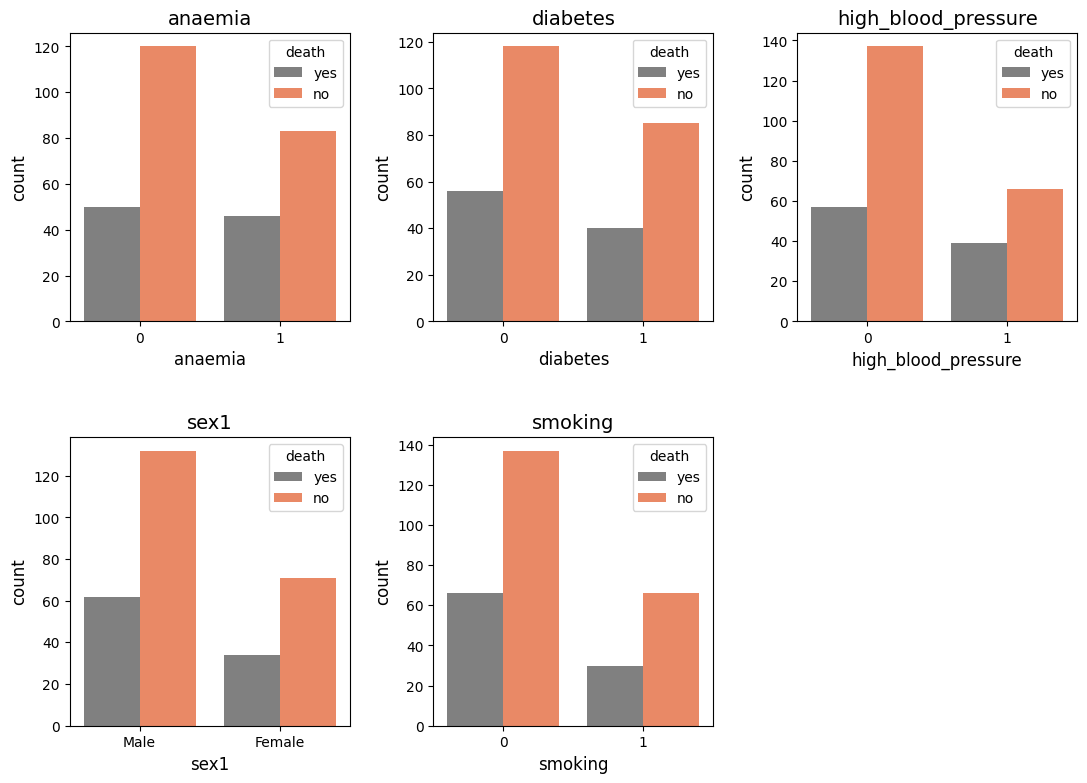

In [16]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure',
             'sex1', 'smoking']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="death", palette = ['gray', "coral"])

In the plot above, it shows clearly that there is a difference in the number of death events between different sex(only male and female in this dataset), high_blood pressure, smoking, and diabetes status. But at the same time, it also shows that the dataset is not balanced in terms of the number of people who smoke and do not smoke or the number of people having diabetes or not, or the number of males and the number of females. So, looking at the proportion will give us a clear idea.

At the moment, I can think of taking crosstab between each of these variables and the death variable. Let's start with the sex1 variable:

In [17]:
x = pd.crosstab(df["sex1"], df['death'])
x

death,no,yes
sex1,,
Female,71,34
Male,132,62


You can see the numbers. How many deaths happen in the male population and how many deaths happened in the female population. But proportions will be more informative in this case. Because clearly number of male and the number of females are not the same.

In [18]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
sex1,,
Female,0.676190,0.323810
Male,0.680412,0.319588


Look! The deaths in male and female population both are approximately 32%. So they are the same. I did the same for the other four categorical variables as well.

In [20]:
x = pd.crosstab(df["anaemia"], df['death'])
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
anaemia,,
0,0.705882,0.294118
1,0.643411,0.356589


The proportion of death for people with anemia is a bit higher.

In [21]:
x = pd.crosstab(df["diabetes"], df['death'])
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
diabetes,,
0,0.678161,0.321839
1,0.680000,0.320000


Here, the proportion of death for people with diabetes and with no diabetes is exactly the same.

In [22]:
x = pd.crosstab(df["smoking"], df['death'])
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
smoking,,
0,0.674877,0.325123
1,0.687500,0.312500


The proportion of death for people with smoking and with no smoking habit are almost the same.

In [23]:
x = pd.crosstab(df["high_blood_pressure"], df['death'])
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
high_blood_pressure,,
0,0.706186,0.293814
1,0.628571,0.371429


Here, the proportion of death is higher in people with high blood pressure.

In all the above analyses, we only tried to determine all the other variable’s relationship with the ‘death’ variable. We can do much more than that. Let’s try to see if we can extract some interesting information.

The next, element is a violin plot that shows the distribution of ‘time’ across smoking and no smoking males and females.

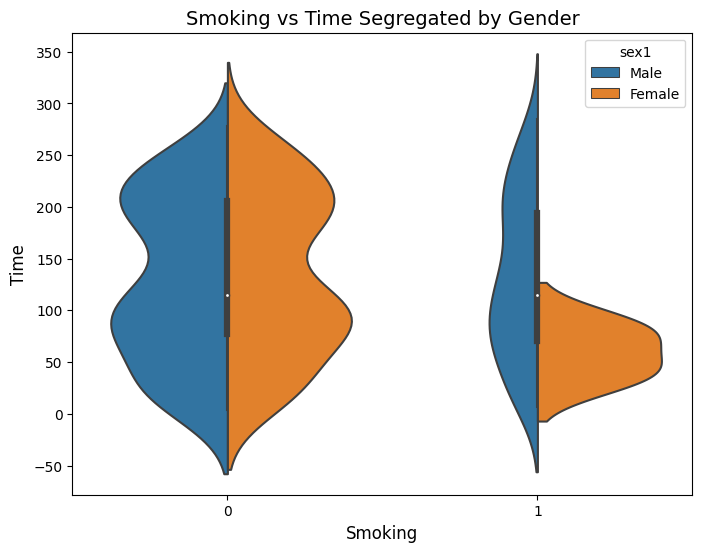

In [25]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(x=df.smoking, y=df.time, hue=df.sex1, split=True)
plt.title("Smoking vs Time Segregated by Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

In the case of no smoking people, males and females have the same distribution. On the other hand, in the case of smoking people, the distribution for males and females is very different. Most females lie in a narrow range from about 0 to 140. Whereas the male population has a range from -50 to 350.

Now I want to see the relation between ‘ejection_fraction’ and ‘time’ segregated by ‘death’.

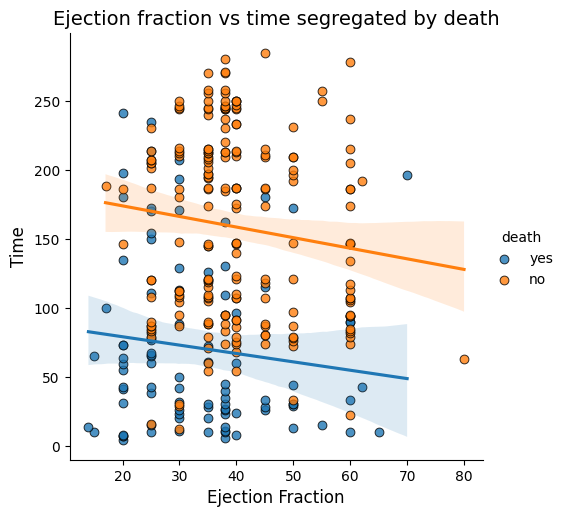

In [26]:
sns.lmplot(x="ejection_fraction", y="time",
           hue="death", data=df, scatter_kws=dict(s=40, linewidths=0.7,
                                            edgecolors='black'))
plt.xlabel("Ejection Fraction", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title("Ejection fraction vs time segregated by death", fontsize=14)
plt.show()

This plot does not provide too much information for now. But you can see the regression line and the confidence band. As expected the confidence band is narrower in the middle where the density of data is higher and wider in the sides where the density of data is lower.

In the next plot, let’s see another comparison between the male and female population. How ‘time’ changes with ‘age’:

<Figure size 1600x640 with 0 Axes>

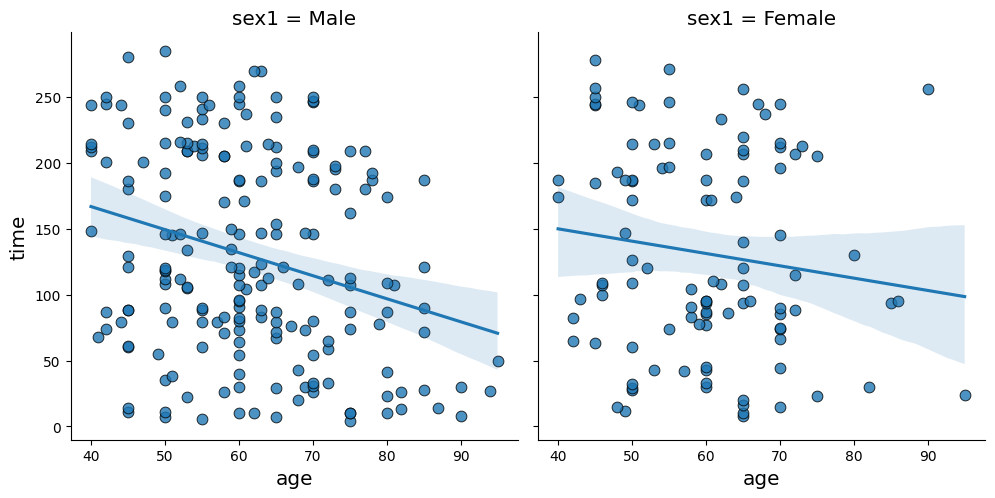

In [27]:
fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='age', y='time',
               data = df,
               robust = True,
              palette="Set1", col="sex1",
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='x-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')

Notice the regression line here, For the male population, the regression line is much steeper. With ‘age’, ‘time’ goes down.

In most plots above, we tried to find out the relationships between variables. A heat map that shows the correlation amongst all the variables is very helpful. Heat maps are used in feature selection for machine learning and also in data analytics to understand the correlation between the variables.

<ipython-input-28-0ea77d19bbe3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="crest")


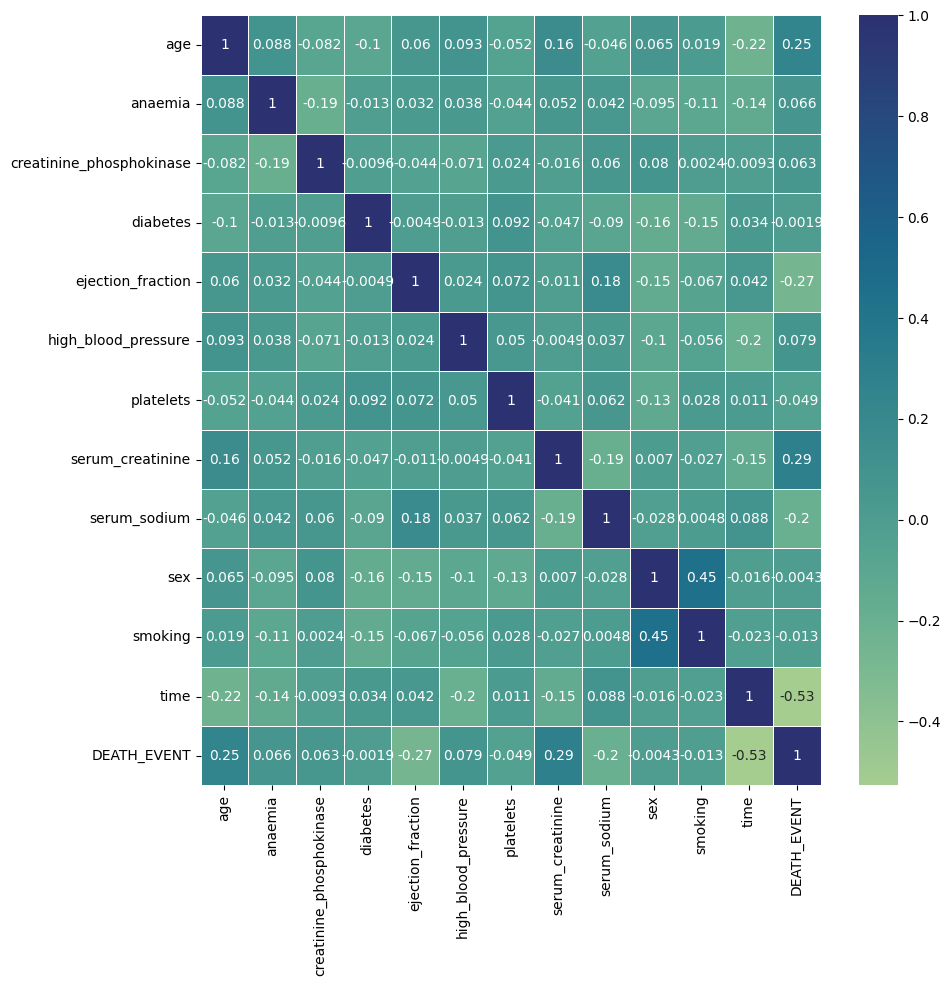

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

Notice the regression line here, For the male population, the regression line is much steeper. With ‘age’, ‘time’ goes down.

In most plots above, we tried to find out the relationships between variables. A heat map that shows the correlation amongst all the variables is very helpful. Heat maps are used in feature selection for machine learning and also in data analytics to understand the correlation between the variables.

In [29]:
df = df.drop(columns=['sex1', 'death'])

Data preparation

In this dataset, all the columns were originally numeric which required for a machine learning model. We created two columns with strings in the beginning. Those columns need to be deleted.

In [30]:
df = df.dropna()

Also, I will use dropna() function on the dataset. The dataset is pretty clean. But by any chance, if there is any null value, it will delete those rows.

In [31]:
df = df.drop(columns=['anaemia', 'diabetes', 'sex', 'smoking',
                       'creatinine_phosphokinase'])

As I mentioned before, the correlation variable above can be used for feature selection for machine learning. Notice the correlations in the heatmap between the DEATH_EVENT and the other variables in the last column of the heat map. The correlation is very low between the DEATH_EVENT and ‘anaemia’, ‘diabetes’, ‘sex’, ‘smoking’, ‘creatinine_phosphokinase’.

I will simply drop those columns from the dataset.

In [33]:
y = df['DEATH_EVENT']

In [34]:
X = df.drop(columns=['DEATH_EVENT'])

This is a good idea to bring all the variables in the dataset on the same scale. Look, different variables have different ranges. Like ‘platelets’ have a very high range. On the other hand, serum_creatinine has a very low range. To bring all the continuous variable ranges similar, I will divide each of them by their maximum value.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

Separation of Training and Test Data

One last step before training the model. Usually, a part of the data is kept separate from the training data in machine learning. So that after training the model, you can check the model with some data that is unseen by the model. But the labels or the outputs are known to you.

The scikit_learn library has a train_test_split function for that.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf_tree = DecisionTreeClassifier(random_state=21, max_depth = 7, max_leaf_nodes=6).fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]


The accuracy rate is 0.84 or 84%. Also, the F Score is 0.89. The closer the F Score to 1, the better the model is.

Now if you know the ‘age’, ‘ejection_fraction’, ‘high_blood_pressure’, ‘platelets’, ‘serum_creatinine’, ‘serum_sodium’, ‘time’, about a person, you can predict if that person is dead or alive. And the prediction is correct almost 81% of the time.